# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

In this worksheet we’ll have a further look at `curve_fit()`, in particular in the presence of noisy data.

We will look at simulating the analysis of a continuous gravitational-wave signal from deformed Neutron Stars of the kind analysed in [this paper](https://arxiv.org/pdf/2107.00600.pdf). While we will use a simplified signal, those objects do emit sinusoidal gravitational waves.

To illustrate the effect of the noise, it can be helpful to make animation. Look at the snippet bellow, you will have to tranform it for some of the exercises.

In [7]:
# Some imports for animating.
from matplotlib.animation import FuncAnimation
from IPython import display # This is specific to IPython, upon which jupyter notebooks are built.

In [8]:
# Creating an empty figure
fig = plt.figure()
ax = plt.axes()

# Initialisation of the plot element `line` as empty:
line, = ax.plot([],label='data',color='red')
# We could in general have more than one plot element.

x=np.linspace(0,2*np.pi,100)

# Setting axes so they don't move from frame to frame
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.1,1.1)

# The anination function, which gets run for each frame, with a
# different frame number. It has to accept as input a single
# frame number, and replace the data for each frame number
def animate(frame_num):

    # This function updated the data of the line element.
    # In this example we have a sine wave, but this could
    # be anything that depends on the frame number.
    line.set_data(x,np.sin(x+frame_num/100))
    return line

# Animation function, for `frames` number of frame, with `interval` ms
# between frames.
anim=FuncAnimation(fig,animate,frames=100, interval=20)

# And display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See the bottom of the worksheet for Exercise 0, solved on video available on LearningCentral.

## Exercise 1

1. [2] Write a function that returns a sinusoid signal, in the form that can be used by curve_fit(). It should take as input an array of time values, and be parametrised by an amplitude, a frequency and a phase. You should be able to reuse the function you wrote for Exercise 1 in week 2.

    Plot the resulting signal from calling that function with unit amplitude, unit frequency, zero phase over an array of time from 0 to 10, with at least 100 points. In this example, we are using arbitrary units where all the quantities become numbers close to 1. This is a common technique to avoid large dynamic ranges in the numbers used by the program.

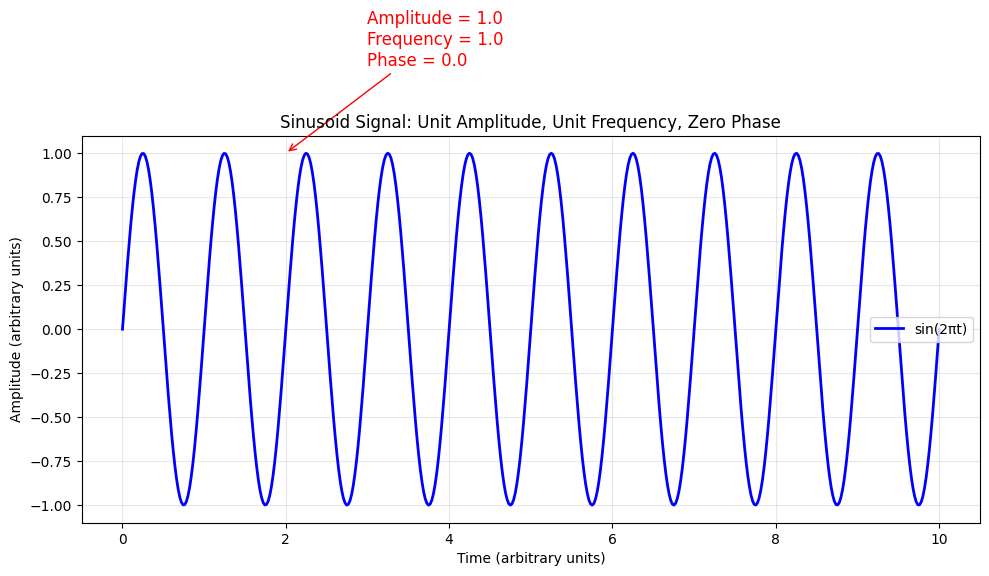

Time array: 500 points from 0.0 to 10.0
Signal range: -1.000 to 1.000
Number of periods shown: 10


In [34]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoid(t, amplitude, frequency, phase):    # Returns a sinusoid signal that can be used by curve_fit()

    return amplitude * np.sin(2 * np.pi * frequency * t + phase)


t = np.linspace(0, 10, 500)


signal = sinusoid(t, amplitude=1.0, frequency=1.0, phase=0.0)

plt.figure(figsize=(10, 6))
plt.plot(t, signal, 'b-', linewidth=2, label='sin(2πt)')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude (arbitrary units)')
plt.title('Sinusoid Signal: Unit Amplitude, Unit Frequency, Zero Phase')
plt.grid(True, alpha=0.3)
plt.legend()


plt.annotate(f'Amplitude = 1.0\nFrequency = 1.0\nPhase = 0.0',
             xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')

plt.tight_layout()
plt.show()


print(f"Time array: {len(t)} points from {t[0]} to {t[-1]}")
print(f"Signal range: {np.min(signal):.3f} to {np.max(signal):.3f}")
print(f"Number of periods shown: {10}")  # Since frequency = 1 over 10 time units

2. [2] The signal from 1) with unit amplitude, unit frequency and zero phase will be our reference signal. We are now trying to see how much noise can be added until we have troubles recovering it. This could for instance help set an experiment's requirement.

    Create a function that returns random Gaussian noise, centered around zero, and with the same number of points as in an array of time values. The function should take as input the standard deviation of the noise, and something to tell how many points are needed: either 1) the number of points to generate directly, or 2) an array to take the length of.

    Plot the noise obtained from that function with unit standard deviation on top of the signal from the question above, as a function of the same time array.

NOISE CHARACTERIZATION
Noise standard deviation (requested): 1.0
Noise standard deviation (actual): 0.9772
Noise mean: 0.052810
Noise variance: 0.9549
Signal-to-Noise Ratio (SNR): 0.7229
Signal power: 0.4990
Noise power: 0.9577


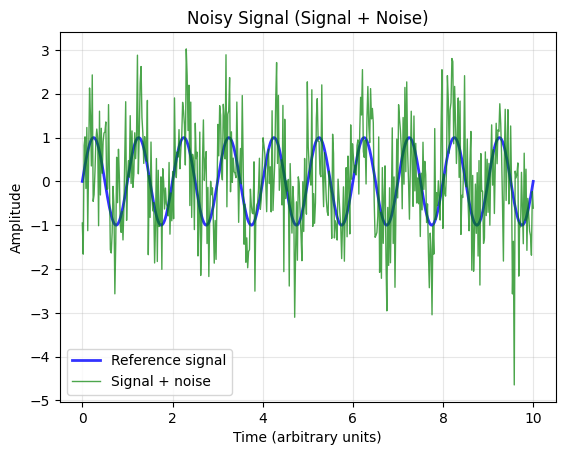

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoid(t, amplitude, frequency, phase):    # Returns a sinusoid signal that can be used by curve_fit()

    return amplitude * np.sin(2 * np.pi * frequency * t + phase)


def gaussian_noise(sigma_noise, size_or_array):   #  Returns random Gaussian noise centered around zero
    if hasattr(size_or_array, '__len__'):

        n_points = len(size_or_array)
    else:

        n_points = size_or_array

    return np.random.normal(0, sigma_noise, n_points)

t = np.linspace(0, 10, 500)
amplitude = 1.0
frequency = 1.0
phase = 0.0
reference_signal = sinusoid(t, amplitude, frequency, phase)


sigma_noise = 1.0
noise = gaussian_noise(sigma_noise, t)



noisy_signal = reference_signal + noise
plt.plot(t, reference_signal, 'b-', linewidth=2, label='Reference signal', alpha=0.8)
plt.plot(t, noisy_signal, 'g-', alpha=0.7, linewidth=1, label='Signal + noise')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')
plt.title('Noisy Signal (Signal + Noise)')
plt.grid(True, alpha=0.3)
plt.legend()



print("=" * 60)
print("NOISE CHARACTERIZATION")
print("=" * 60)
print(f"Noise standard deviation (requested): {sigma_noise}")
print(f"Noise standard deviation (actual): {np.std(noise):.4f}")
print(f"Noise mean: {np.mean(noise):.6f}")
print(f"Noise variance: {np.var(noise):.4f}")
print(f"Signal-to-Noise Ratio (SNR): {np.std(reference_signal)/np.std(noise):.4f}")
print(f"Signal power: {np.mean(reference_signal**2):.4f}")
print(f"Noise power: {np.mean(noise**2):.4f}")


3. [2] Putting things together, create a function with the following call signature:
   
   ```python
   gen_data(t,signal,sigma_noise=1)
   ```
   Which returns the sum of the signal and noise generated with `sigma_noise` as its standard deviation, using the functions you wrote in question 1) and in question 2). Plot the result  few times (i.e. for a few different random noises), with the reference signal.

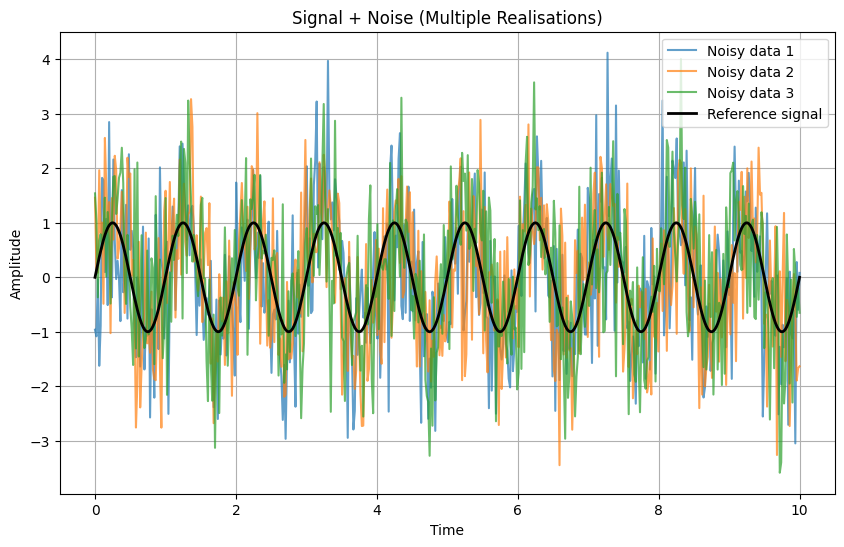

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoid(t, amplitude, frequency, phase):     #Returns a sinusoid signal for curve_fit()
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def gaussian_noise(sigma_noise, size_or_array):   #Returns random Gaussian noise centered around zero
    if hasattr(size_or_array, '__len__'):
        n_points = len(size_or_array)
    else:
        n_points = size_or_array
    return np.random.normal(0, sigma_noise, n_points)

def gen_data(t, signal, sigma_noise=1):      #Returns the sum of signal and noise
    noise = gaussian_noise(sigma_noise, t)
    return signal + noise

t = np.linspace(0, 10, 500)
reference_signal = sinusoid(t, 1, 1, 0)


plt.figure(figsize=(10, 6))

for i in range(3):
    data = gen_data(t, reference_signal, sigma_noise=1)
    plt.plot(t, data, alpha=0.7, label=f'Noisy data {i+1}')

plt.plot(t, reference_signal, 'k-', linewidth=2, label='Reference signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal + Noise (Multiple Realisations)')
plt.legend()
plt.grid(True)
plt.show()

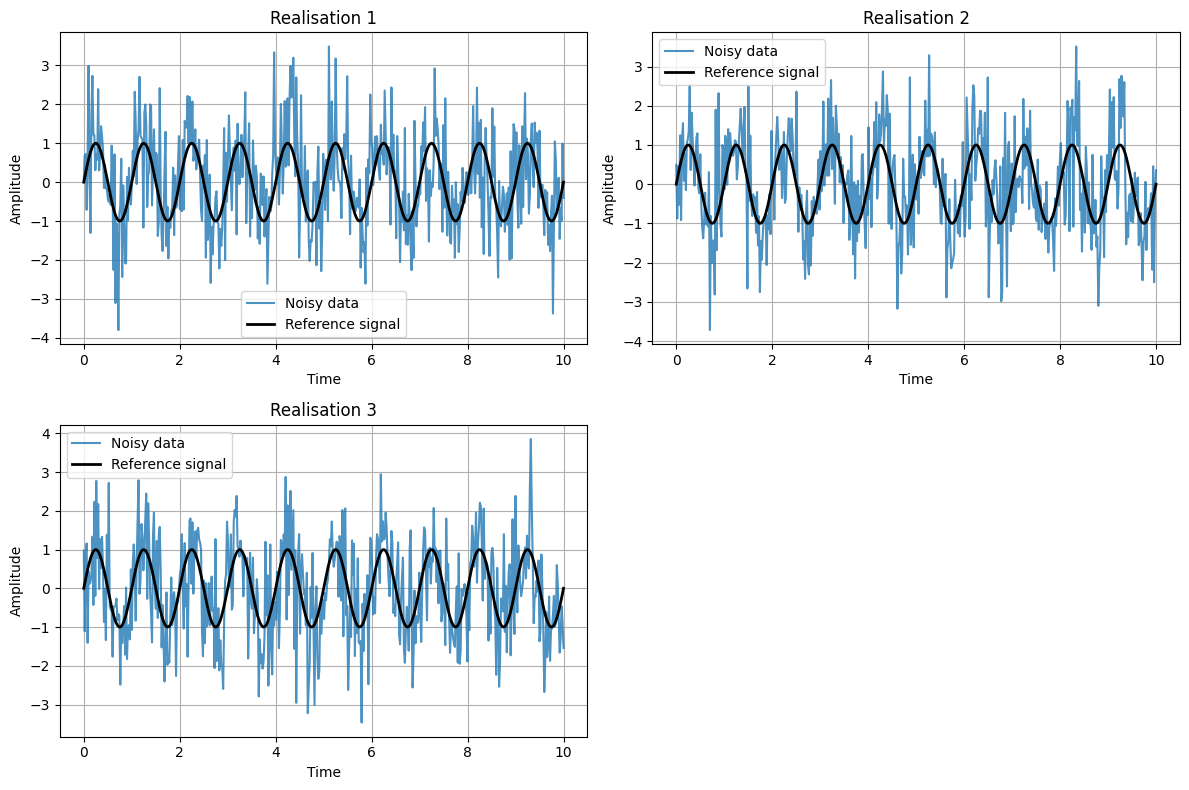

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoid(t, amplitude, frequency, phase):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def gaussian_noise(sigma_noise, size_or_array):
    if hasattr(size_or_array, '__len__'):
        return np.random.normal(0, sigma_noise, len(size_or_array))
    else:
        return np.random.normal(0, sigma_noise, size_or_array)

def gen_data(t, signal, sigma_noise=1):
    noise = gaussian_noise(sigma_noise, t)
    return signal + noise

t = np.linspace(0, 10, 500)
reference_signal = sinusoid(t, 1, 1, 0)


plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(2, 2, i+1)
    data = gen_data(t, reference_signal, sigma_noise=1)
    plt.plot(t, data, alpha=0.8, label='Noisy data')
    plt.plot(t, reference_signal, 'k-', linewidth=2, label='Reference signal')
    plt.title(f'Realisation {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

4. [4] We will now run `curve_fit()` on the data we created, and see how well we can recover our reference signal. Create some data by using `gen_data()` to generate data with our reference signal added to random Gaussian noise of unit standard deviation.

    First, plot this data with the reference signal and a fitting signal from your sinusoid function from Exercise 1 that is a bit offset from the true signal values.

    Then, run `curve_fit()` on the data with the signal model. Plot and print the result.

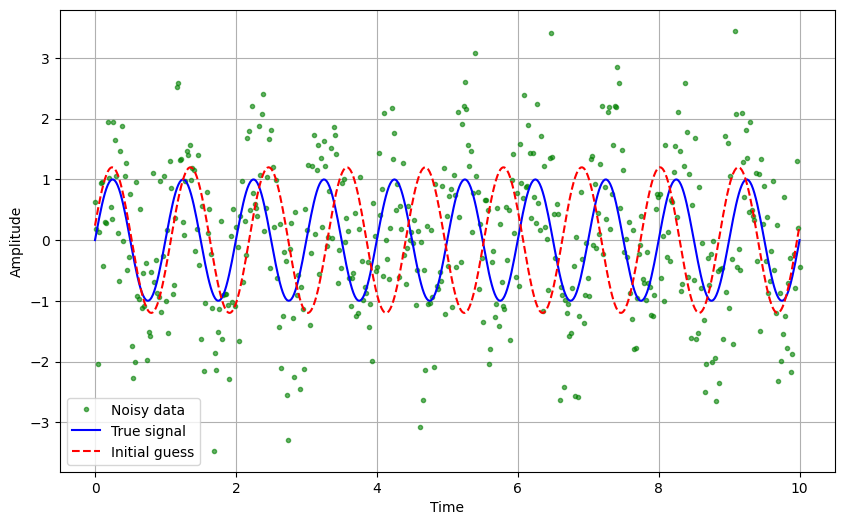

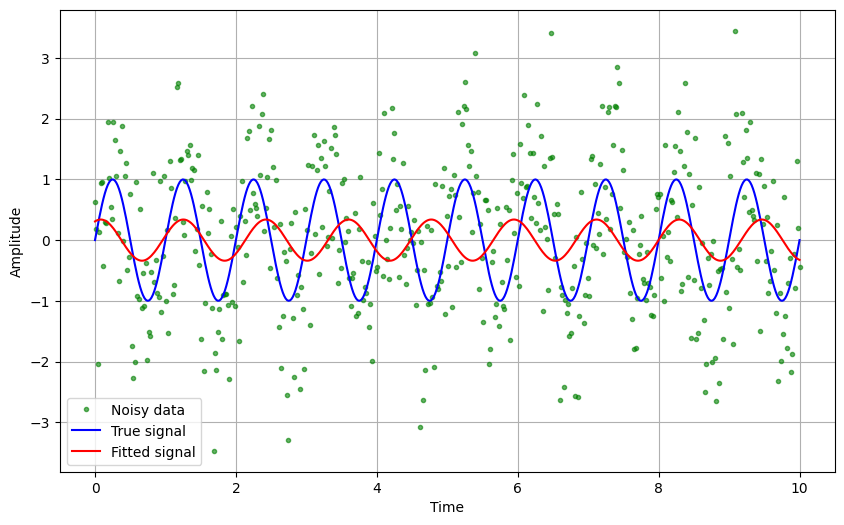

Fitting results:
True: A=1.000, f=1.000, φ=0.000
Fit:  A=0.339±0.076, f=0.852±0.012, φ=1.140±0.454


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sinusoid(t, amplitude, frequency, phase):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

t = np.linspace(0, 10, 500)
reference_signal = sinusoid(t, 1, 1, 0)
data = gen_data(t, reference_signal, sigma_noise=1)

initial_guess = [1.2, 0.9, 0.2]
initial_signal = sinusoid(t, *initial_guess)


plt.figure(figsize=(10, 6))
plt.plot(t, data, 'g.', alpha=0.6, label='Noisy data')
plt.plot(t, reference_signal, 'b-', label='True signal')
plt.plot(t, initial_signal, 'r--', label='Initial guess')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


popt, pcov = curve_fit(sinusoid, t, data, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))


plt.figure(figsize=(10, 6))
plt.plot(t, data, 'g.', alpha=0.6, label='Noisy data')
plt.plot(t, reference_signal, 'b-', label='True signal')
plt.plot(t, sinusoid(t, *popt), 'r-', label='Fitted signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


print("Fitting results:")
print(f"True: A=1.000, f=1.000, φ=0.000")
print(f"Fit:  A={popt[0]:.3f}±{perr[0]:.3f}, f={popt[1]:.3f}±{perr[1]:.3f}, φ={popt[2]:.3f}±{perr[2]:.3f}")

5. [2] From the amplitude $a$ of the signal and its frequency $f$, we can compute the quantity:
$\frac{a}{f^2}$. Which, if we can find out the distance between us and the Neutron Star at the source of this signal, is a useful quantity to infer the star's mass quadrupole moment (and its moment of inertia).

    Use the `uncertainties` package to propagate the uncertainties measured by `curve_fit()` into the uncertainties for $\frac{a}{f^2}$.

In [41]:
!pip install uncertainties
import uncertainties as unc
from uncertainties import unumpy


a = unc.ufloat(popt[0], perr[0])
f = unc.ufloat(popt[1], perr[1])
af2 = a * f**2

print(f"af² = {af2}")

af² = 0.25+/-0.06


6. [4] Repeat the process above (create noise, create data=signal+noise, fit the data) with different `sigma_noise` values. Try to see what values are reached before the uncertainty of the fit obtained with `curve_fit()` becomes very large. Illustrate this with an animation, choosing appropriate values.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as unc
import matplotlib.animation as animation
from IPython import display

def sinusoid(t, amplitude, frequency, phase):  # Define the sinusoid function for curve fitting
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def gaussian_noise(sigma_noise, size_or_array):    # Creates time array and reference signal (true values: A=1, f=1, φ=0)
    if hasattr(size_or_array, '__len__'):
        return np.random.normal(0, sigma_noise, len(size_or_array))
    else:
        return np.random.normal(0, sigma_noise, size_or_array)

def gen_data(t, signal, sigma_noise=1):     # Generates noisy data by adding Gaussian noise to the reference signal
    noise = gaussian_noise(sigma_noise, t)
    return signal + noise

# Create figure before the animation function
fig, ax1 = plt.subplots(figsize=(10, 6))

def animate(frame):
    ax1.clear()

    sigma_noise = 0.1 + frame * 0.5
    t = np.linspace(0, 10, 200)
    reference_signal = sinusoid(t, 1, 1, 0)
    data = gen_data(t, reference_signal, sigma_noise=sigma_noise)

    try:
        popt, pcov = curve_fit(sinusoid, t, data, p0=[1, 1, 0])         ## Performs curve fitting to find the best parameters that match the noisy data
        perr = np.sqrt(np.diag(pcov))
        fitted_signal = sinusoid(t, *popt)

        ax1.plot(t, data, 'g-', alpha=0.7, label='Noisy data')
        ax1.plot(t, reference_signal, 'b-', label='True signal')
        ax1.plot(t, fitted_signal, 'r-', label='Fitted signal')
        ax1.set_title(f'Sinusoidal Curve Fitting with Increasing Noise (σ = {sigma_noise:.1f})')
        ax1.set_xlabel('Time (s)')  # Added x-axis label
        ax1.set_ylabel('Amplitude')  # Added y-axis label
        ax1.legend()
        ax1.grid(True)

    except:
        ax1.text(0.5, 0.5, 'Fitting failed', transform=ax1.transAxes, ha='center')
        ax1.set_title(f'Sinusoidal Curve Fitting with Increasing Noise (σ = {sigma_noise:.1f}) - Failed')
        ax1.set_xlabel('Time (s)')  # Added x-axis label even when fitting fails
        ax1.set_ylabel('Amplitude')  # Added y-axis label even when fitting fails

ani = animation.FuncAnimation(fig, animate, frames=50, interval=1000, repeat=True)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## Exercise 2

Gravitational waves have two polarisations, usually called $h_+(t)$ and $h_{\times}(t)$. Is is convenient to write a gravitational wave as a complex time series $h(t)=h_+(t)+ih_{\times}(t)$, with the polarisation angle then the argument of the complex numbers.

1. [1] Write a function that, from an amplitude $A$, a frequency $f$ and a phase $\phi$ generates the complex time series:

$$
h(t)=A\,\exp(i(2\pi f t + \phi))
$$

In [42]:
import numpy as np

def complex_gravitational_wave(t, A, f, phi):

        return A * np.exp(1j * (2 * np.pi * f * t + phi))

# Example usage
t = np.linspace(0, 10, 1000)
h = complex_gravitational_wave(t, A=1.0, f=1.0, phi=0.0)

print(f"Real part (h+): {h.real[:5]}...")
print(f"Imaginary part (h×): {h.imag[:5]}...")

Real part (h+): [1.         0.99802278 0.99209893 0.98225188 0.96852057]...
Imaginary part (h×): [0.         0.06285329 0.12545803 0.18756665 0.24893355]...


2. [1] Make a 3D plot of that function for $A=1,f=1,\phi=0$, using the axes $(\text{Real}(h(t)),\text{Imag}(h(t)),t)$. To make a 3D plot, of, say, the arrays `x`, `y` and `z` you can use:

```python
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
```

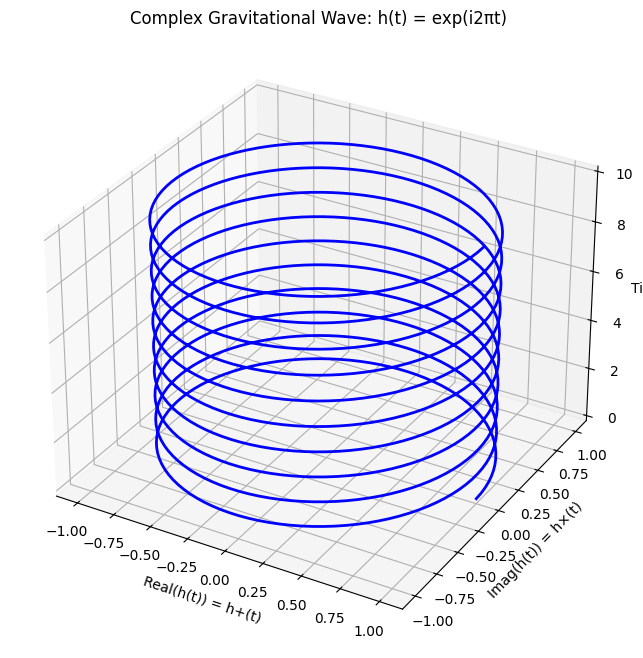

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def complex_gravitational_wave(t, A, f, phi):
    return A * np.exp(1j * (2 * np.pi * f * t + phi))

t = np.linspace(0, 10, 1000)
h = complex_gravitational_wave(t, A=1, f=1, phi=0)


fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot3D(h.real, h.imag, t, 'b-', linewidth=2)

ax.set_xlabel('Real(h(t)) = h+(t)')
ax.set_ylabel('Imag(h(t)) = h×(t)')
ax.set_zlabel('Time')
ax.set_title('Complex Gravitational Wave: h(t) = exp(i2πt)')

plt.show()

3. [2] Create an animation of the plot by varying the phase. You have to make the animation code from above work with a 3D figure. You can replace `line.set_data()` with `line.set_data_3d()`.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

def complex_gravitational_wave(t, A, f, phi):
    return A * np.exp(1j * (2 * np.pi * f * t + phi))

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

t = np.linspace(0, 10, 1000)
A = 1
f = 1


h = complex_gravitational_wave(t, A, f, 0)
line, = ax.plot3D(h.real, h.imag, t, 'b-', linewidth=2)

ax.set_xlabel('Real(h(t)) = h+(t)')
ax.set_ylabel('Imag(h(t)) = h×(t)')
ax.set_zlabel('Time')
ax.set_title('Complex Gravitational Wave with Varying Phase')

def animate(frame):
    phi = frame * 0.1
    h = complex_gravitational_wave(t, A, f, phi)
    line.set_data_3d(h.real, h.imag, t)
    ax.set_title(f'Complex Gravitational Wave: Phase = {phi:.1f} rad')
    return line,


ani = animation.FuncAnimation(fig, animate, frames=100, interval=120, repeat=True)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
plt.show()

## Exercise 0

[0] When we know the data we are trying to fit with `curve_fit()` is more noisy in some places, we can use [`curve_fit()`'s weighted least squares fitting](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). To illustrate this, create a fitting function for a [Lorentzian line shape function](https://en.wikipedia.org/wiki/Spectral_line_shape#Lorentzian). This is often used in gravitational-wave detectors to model lines in the noise spectrum.

$$
line(f)=\frac{A\,\gamma^2}{\gamma^2+(f-f_0)^2}
$$

Over a frequency array from 1 to 20 and at least 100 frequencies, generate:
- a Lorentzian signal with $A=3,\gamma=5,f_0=12$ (arbitrary units)
- Gaussian noise with a standard deviation of $1$ everywhere except for a window from $f=10$ to $f=14$ where the noise is higher, with a standard deviation of $5$.
- perform the fit with and without weights (the `sigma` argument in `curve_fit()`), running the program until you see a good illustation of weighted least squares fitting.

(this exercise is for demonstration purposes and won't be marked)